Quiz 4

Silu Men

smen2@jhu.edu

Github ID: smen2

In [0]:
# Question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn import linear_model as lm

# Gets the data if it doesn't exist
! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi
  
# Reads in the data
df = pd.read_csv("/content/kirby21.csv")

In [0]:
# Isolates the data for regression
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]

left = t1l1[t1l1['roi']=='Telencephalon_L']
right = t1l1[t1l1['roi']=='Telencephalon_R']
csf = t1l1[t1l1['roi']=='CSF']

In [0]:
# Transforms the data into np arrays
left = left.volume
right = right.volume
csf = csf.volume

left = np.array(left)
right = np.array(right)
csf = np.array(csf)

In [0]:
# Combines the 2 regressors into 1 matrix
X = np.column_stack((left, right))
print(X.shape)

(20, 2)


In [0]:
# Performs the Linear Regression
csf_mdl = lm.LinearRegression()
parameters = csf_mdl.fit(X,csf)

#Displays the calculated parameters
print(csf_mdl.coef_, csf_mdl.intercept_)

[ 1.94975321 -1.70030499] -22868.55147172518


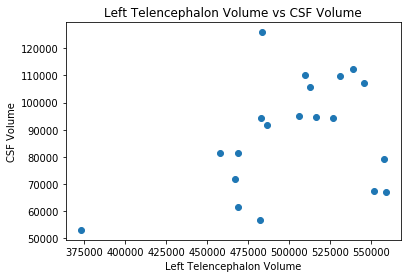

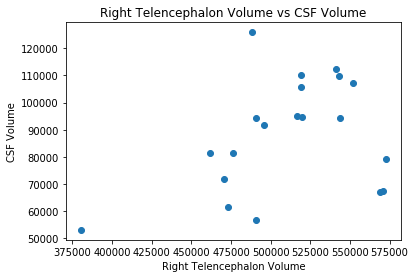

In [0]:
# Scatter plots the two regressors vs CSF volume
plt.scatter(left, csf)
plt.title('Left Telencephalon Volume vs CSF Volume')
plt.xlabel('Left Telencephalon Volume')
plt.ylabel('CSF Volume')
plt.show()

plt.scatter(right, csf)
plt.title('Right Telencephalon Volume vs CSF Volume')
plt.xlabel('Right Telencephalon Volume')
plt.ylabel('CSF Volume')
plt.show()

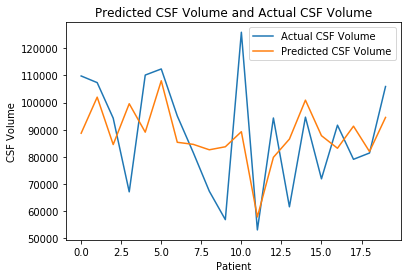

In [0]:
# Generates the predicted CSF volumes
csf_pred = np.matmul(X, np.array(csf_mdl.coef_)) + csf_mdl.intercept_
patient = np.arange(20)

# Plots the predicted value vs the given value
plt.plot(patient, csf)
plt.plot(patient, csf_pred)
plt.legend(['Actual CSF Volume', 'Predicted CSF Volume'])
plt.xlabel('Patient')
plt.ylabel('CSF Volume')
plt.title('Predicted CSF Volume and Actual CSF Volume')
plt.show()

Interpretation of the Coefficients

$\beta_{0} = -22868.55147172518$ - this is the intercept value, this means that if a person had no telencephalon volume, then their predicted csf volume would be this.

$\beta_{1} = 1.94975321$ - this is the coefficient for left telencephalon volume. This coefficient implies that if we keep the right telencephalon volume constant, for each unit increase in left telencephalon volume then the volume of CSF goes up by $\beta_{1}$.

$\beta_{2} = -1.70030499$ - this is the coefficient for right telencephalon volume. This coefficient implies that if we keep the left telencephalon volume constant, for each unit increase in right telencephalon volume then the volume of CSF goes up by $\beta_{2}$.



In [0]:
# Gets the data if it does not exist
! if [ ! -e binary.csv ] ; \
  then wget https://stats.idre.ucla.edu/stat/data/binary.csv; \
fi
  
# Reads in the data and prints out the first 4 rows
df = pd.read_csv("/content/binary.csv")

df.head(4)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4


In [0]:
# Converts the data to np arrays
Y = np.array(df.admit)

X = df[['gre', 'gpa', 'rank']]

X = np.array(X)

In [0]:
# Checks the sizes of the arrays
print(X.shape)
print(Y.shape)

(400, 3)
(400,)


In [0]:
import statsmodels as sm

# Creates the training and testing data
trainFraction = 0.75
sample = np.random.uniform(size = 400) < trainFraction

Y_train = Y[sample]
Y_test = Y[~sample]

X_train = X[sample][:]
X_test = X[~sample][:]

# Prints the dimensions of the training and testing data
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(298, 3)
(102, 3)
(298,)
(102,)


In [0]:
# Performs the logistic regression
admit_mdl = lm.LogisticRegression(fit_intercept = True, solver = 'newton-cg')
admit_mdl.fit(X_train, Y_train)

# Prints out the coefficients
print(admit_mdl.coef_, admit_mdl.intercept_)

[[ 0.00331795  0.86193987 -0.56850626]] [-4.26939231]


Intepret the Coefficients

$\beta_{0} = -2.67841337$ This is the intercept, which means that if the regressors were 0, then the probability of getting in is $\frac{e^{\beta_{0}}}{1+e^{\beta_{0}}}$

$\beta_{1} = 0.00346256$ represents the change in expected log odds if there is a 1 unit increase in GRE score when the other regressors are constant.

$\beta_{2} = 0.41716406$ represents the change in expected log odds if there is a 1 unit increase in GPA when the other regressors are constant.

$\beta_{3} = -0.63413261$ represents the change in expected log odds if there is a 1 unit increase in rank when the other regressors are constant.

In [0]:
# Creates our prediction matrix
Y_pred = admit_mdl.predict_proba(X_test)
print(admit_mdl.classes_)

# Saves only the predictions for success 
Y_pred = Y_pred[:,1]

[0 1]


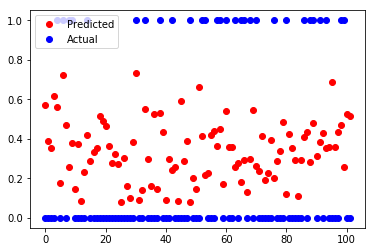

In [0]:
# Scatter plots the predictions vs the actual
plt.plot(Y_pred, 'ro')
plt.plot(Y_test, 'bo')
plt.legend(['Predicted', 'Actual'])
plt.show()

In [0]:
# Generates the threshold values
threshold = np.linspace(0,1,101)

In [0]:
# Calculates the accuracy, sensitivity, and specificity
# by comparing the indices of where 0's and 1's are
acc = []
sens = []
spec = []
  
for i in range(len(threshold)):
  # Transforms the data to binary based on our threshold
  Y_pred_temp = np.array([1 if (j > threshold[i]) else 0 for j in Y_pred])
  one_loc_test = Y_test == 1
  one_loc_pred = Y_pred_temp == 1
  Y_test_one = Y_test[one_loc_test]
  Y_pred_one = Y_pred_temp[one_loc_test]
  zero_loc_test = Y_test == 0
  zero_loc_pred = Y_pred_temp == 0
  Y_test_zero = Y_test[zero_loc_test]
  Y_pred_zero = Y_pred_temp[zero_loc_test]
  
  # Appends the values for our specificity, sensitivity and accuracy
  spec.append(np.sum(Y_pred_zero == Y_test_zero)/len(zero_loc_pred))
  sens.append(np.sum(Y_pred_one == Y_test_one)/len(one_loc_pred))
  #spec.append(np.mean(Y_pred_zero == Y_test_zero))
  #sens.append(np.mean(Y_pred_one == Y_test_one))
  acc.append(np.mean(Y_pred_temp == Y_test))

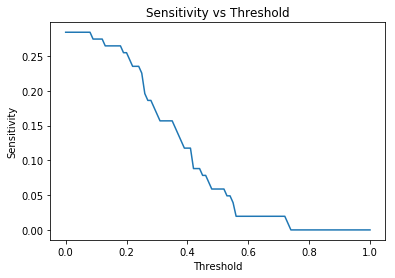

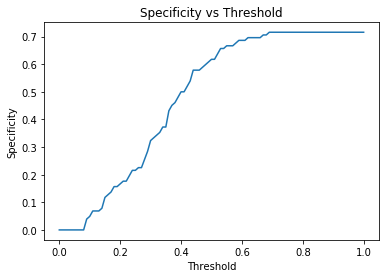

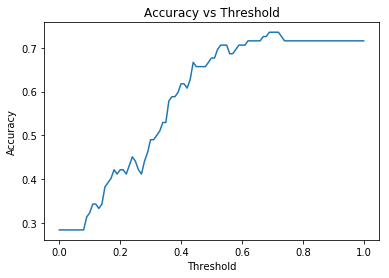

In [0]:
# Plots the sensitivity
plt.plot(threshold, sens)
plt.title('Sensitivity vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Sensitivity')
plt.show()

# Plots the specificity
plt.plot(threshold, spec)
plt.title('Specificity vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Specificity')
plt.show()

# Plots the accuracy
plt.plot(threshold, acc)
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

In [0]:
# 3
# gets the data if it doesn't already exist
! if [ ! -e movies.csv ] ; \
  then wget https://raw.githubusercontent.com/smen2/bmedatascience/master/movies.csv; \
fi

# reads in the data  
df = pd.read_csv("/content/movies.csv", encoding='latin-1')

# prints out the first 10 rows
df.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [0]:
# Displays the column titles
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [0]:
# Creates the ground truth (Y) and regressor matrix (X)
Y = np.array(df[['popularity']])
X = np.array(df[['budget', 'revenue', 'vote_average', 'vote_count']])
labels = np.array(['Budget', 'Revenue', 'Vote Average', 'Vote Count'])

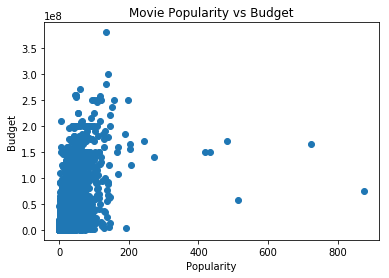

Correlation for the above scatter is 0.5054139990665326


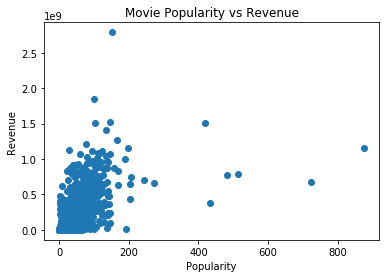

Correlation for the above scatter is 0.644723504555998


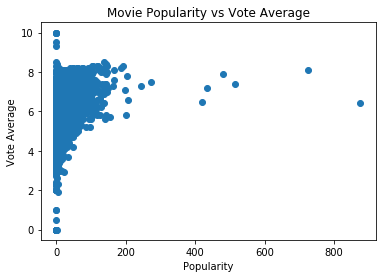

Correlation for the above scatter is 0.2739518286190278


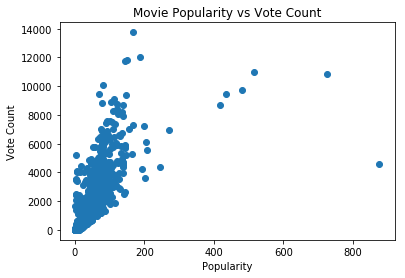

Correlation for the above scatter is 0.7781298890348538


In [0]:
# Performs scatter plots for each of the regressors
for i in range(X.shape[1]):
  plt.scatter(Y, X[:,i])
  graph_title = 'Movie Popularity vs ' + labels[i]
  plt.title(graph_title)
  plt.xlabel('Popularity')
  plt.ylabel(labels[i])
  plt.show()
  # Displays the correlation for the scatter plots
  print('Correlation for the above scatter is', np.corrcoef(Y[:,0], X[:,i])[1,0])